In [1]:
%matplotlib inline


# Morphological Filtering

Morphological image processing is a collection of non-linear operations related
to the shape or morphology of features in an image, such as boundaries,
skeletons, etc. In any given technique, we probe an image with a small shape or
template called a structuring element, which defines the region of interest or
neighborhood around a pixel.

In this document we outline the following basic morphological operations:

1. Erosion
2. Dilation
3. Opening
4. Closing
5. White Tophat
6. Black Tophat
7. Skeletonize
8. Convex Hull


To get started, let's load an image using ``io.imread``. Note that morphology
functions only work on gray-scale or binary images, so we set ``as_gray=True``.


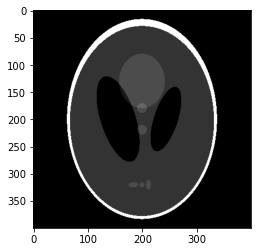

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte

orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

Let's also define a convenience function for plotting comparisons:



In [3]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

## Erosion

Morphological ``erosion`` sets a pixel at (i, j) to the *minimum over all
pixels in the neighborhood centered at (i, j)*. The structuring element,
``footprint``, passed to ``erosion`` is a boolean array that describes this
neighborhood. Below, we use ``disk`` to create a circular structuring
element, which we use for most of the following examples.



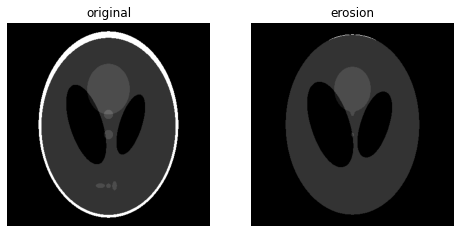

In [4]:
from skimage.morphology import erosion, dilation, opening, closing,  white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
footprint = disk(6)
eroded = erosion(orig_phantom, footprint)
plot_comparison(orig_phantom, eroded, 'erosion')

Notice how the white boundary of the image disappears or gets eroded as we
increase the size of the disk. Also notice the increase in size of the two
black ellipses in the center and the disappearance of the 3 light gray
patches in the lower part of the image.

## Dilation

Morphological ``dilation`` sets a pixel at (i, j) to the *maximum over all
pixels in the neighborhood centered at (i, j)*. Dilation enlarges bright
regions and shrinks dark regions.



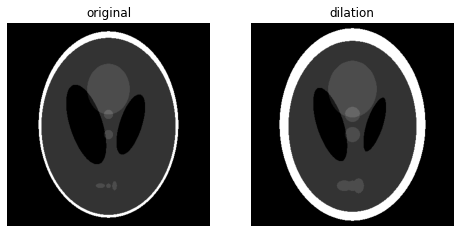

In [5]:
dilated = dilation(orig_phantom, footprint)
plot_comparison(orig_phantom, dilated, 'dilation')

Notice how the white boundary of the image thickens, or gets dilated, as we
increase the size of the disk. Also notice the decrease in size of the two
black ellipses in the centre, and the thickening of the light gray circle
in the center and the 3 patches in the lower part of the image.

## Opening

Morphological ``opening`` on an image is defined as an *erosion followed by
a dilation*. Opening can remove small bright spots (i.e. "salt") and
connect small dark cracks.



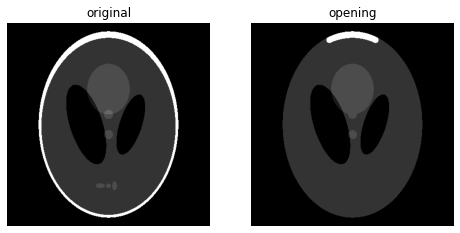

In [6]:
opened = opening(orig_phantom, footprint)
plot_comparison(orig_phantom, opened, 'opening')

Since ``opening`` an image starts with an erosion operation, light regions
that are *smaller* than the structuring element are removed. The dilation
operation that follows ensures that light regions that are *larger* than
the structuring element retain their original size. Notice how the light
and dark shapes in the center their original thickness but the 3 lighter
patches in the bottom get completely eroded. The size dependence is
highlighted by the outer white ring: The parts of the ring thinner than the
structuring element were completely erased, while the thicker region at the
top retains its original thickness.

## Closing

Morphological ``closing`` on an image is defined as a *dilation followed by
an erosion*. Closing can remove small dark spots (i.e. "pepper") and
connect small bright cracks.

To illustrate this more clearly, let's add a small crack to the white
border:



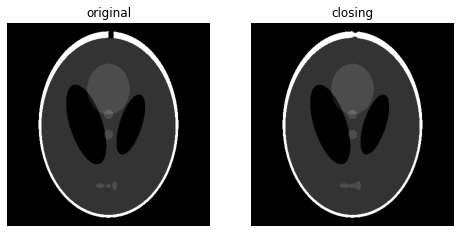

In [7]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, footprint)
plot_comparison(phantom, closed, 'closing')

Since ``closing`` an image starts with an dilation operation, dark regions
that are *smaller* than the structuring element are removed. The dilation
operation that follows ensures that dark regions that are *larger* than the
structuring element retain their original size. Notice how the white
ellipses at the bottom get connected because of dilation, but other dark
region retain their original sizes. Also notice how the crack we added is
mostly removed.

## White tophat

The ``white_tophat`` of an image is defined as the *image minus its
morphological opening*. This operation returns the bright spots of the
image that are smaller than the structuring element.

To make things interesting, we'll add bright and dark spots to the image:



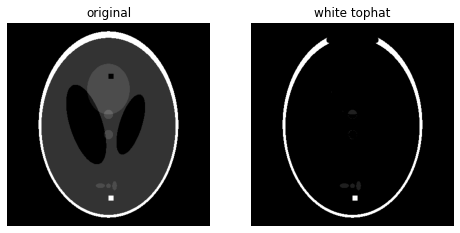

In [8]:
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0

w_tophat = white_tophat(phantom, footprint)
plot_comparison(phantom, w_tophat, 'white tophat')

As you can see, the 10-pixel wide white square is highlighted since it is
smaller than the structuring element. Also, the thin, white edges around
most of the ellipse are retained because they're smaller than the
structuring element, but the thicker region at the top disappears.

## Black tophat

The ``black_tophat`` of an image is defined as its morphological **closing
minus the original image**. This operation returns the *dark spots of the
image that are smaller than the structuring element*.



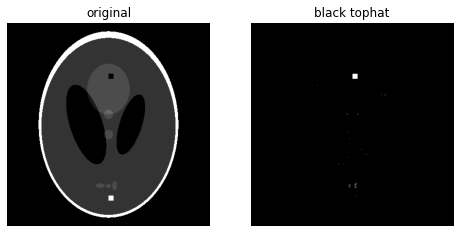

In [9]:
b_tophat = black_tophat(phantom, footprint)
plot_comparison(phantom, b_tophat, 'black tophat')

As you can see, the 10-pixel wide black square is highlighted since
it is smaller than the structuring element.

**Duality**

As you should have noticed, many of these operations are simply the reverse
of another operation. This duality can be summarized as follows:

  1. Erosion <-> Dilation

  2. Opening <-> Closing

  3. White tophat <-> Black tophat

## Skeletonize

Thinning is used to reduce each connected component in a binary image to a
*single-pixel wide skeleton*. It is important to note that this is
performed on binary images only.



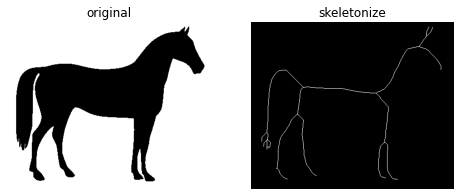

In [10]:
horse = data.horse()

sk = skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

As the name suggests, this technique is used to thin the image to 1-pixel
wide skeleton by applying thinning successively.

## Convex hull

The ``convex_hull_image`` is the *set of pixels included in the smallest
convex polygon that surround all white pixels in the input image*. Again
note that this is also performed on binary images.



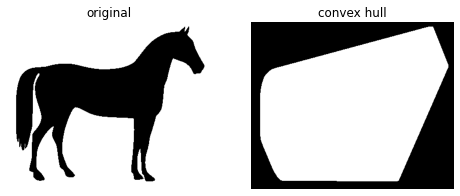

In [11]:
hull1 = convex_hull_image(horse == 0)
plot_comparison(horse, hull1, 'convex hull')

As the figure illustrates, ``convex_hull_image`` gives the smallest polygon
which covers the white or True completely in the image.

If we add a small grain to the image, we can see how the convex hull adapts
to enclose that grain:



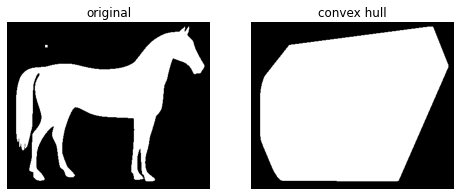

In [12]:
horse_mask = horse == 0
horse_mask[45:50, 75:80] = 1

hull2 = convex_hull_image(horse_mask)
plot_comparison(horse_mask, hull2, 'convex hull')

-------------
# Real life example

### Top hat/white hat and black hat
A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.

A top hat operation is used to reveal bright regions of an image on dark backgrounds.

In [1]:
import cv2
image = cv2.imread("images/Morphological_Operation_Car.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("Original", image)
cv2.waitKey(0)

-1

In [2]:
# defines a rectangular structuring element with a width of 13 pixels and a height of 5 pixels. 

'''
Because a license plate is roughly 3x wider than it is tall!

By having some basic a priori knowledge of the objects you want to detect in images, we can construct structuring elements to better aid us in finding them.

'''

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

In [3]:
# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
# show the output images
cv2.imshow("Original", image)
cv2.imshow("Blackhat", blackhat)
cv2.imshow("Tophat", tophat)
cv2.waitKey(0)

-1

# Application of Morphological Operations Package

#### A FINGER print analysis

In [4]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt


class MorphologicalTransformations(object):
    def __init__(self, image_file, level):
        self.level = 3 if level < 3 else level
        self.image_file = image_file
        self.MAX_PIXEL = 255
        self.MIN_PIXEL = 0
        self.MID_PIXEL = self.MAX_PIXEL // 2
        self.kernel = np.full(shape=(level, level), fill_value=255)
    
    def read_this(self):
        image_src = cv2.imread(self.image_file, 0)
        return image_src
    
    def convert_binary(self, image_src, thresh_val):
        color_1 = self.MAX_PIXEL
        color_2 = self.MIN_PIXEL
        initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
        final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
        return final_conv

    def binarize_this(self):
        image_src = self.read_this()
        image_b = self.convert_binary(image_src=image_src, thresh_val=self.MID_PIXEL)
        return image_b
    
    def get_flat_submatrices(self, image_src, h_reduce, w_reduce):
        image_shape = image_src.shape
        flat_submats = np.array([
            image_src[i:(i + self.level), j:(j + self.level)]
            for i in range(image_shape[0] - h_reduce) for j in range(image_shape[1] - w_reduce)
        ])
        return flat_submats
        
    def erode_image(self, image_src, with_plot=False):
        orig_shape = image_src.shape
        pad_width = self.level - 2
        
        image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
        pimg_shape = image_pad.shape
        
        h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
        flat_submats = self.get_flat_submatrices(
            image_src=image_pad, h_reduce=h_reduce, w_reduce=w_reduce
        )
        
        image_eroded = np.array([255 if (i == self.kernel).all() else 0 for i in flat_submats])
        image_eroded = image_eroded.reshape(orig_shape)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_eroded, head_text='Eroded - {}'.format(self.level))
            return None
        return image_eroded
    
    def dilate_image(self, image_src, with_plot=False):        
        orig_shape = image_src.shape
        pad_width = self.level - 2
        
        image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
        pimg_shape = image_pad.shape
        
        h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
        flat_submats = self.get_flat_submatrices(
            image_src=image_pad, h_reduce=h_reduce, w_reduce=w_reduce
        )
        
        image_dilated = np.array([255 if (i == self.kernel).any() else 0 for i in flat_submats])
        image_dilated = image_dilated.reshape(orig_shape)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_dilated, head_text='Dilated - {}'.format(self.level))
            return None
        return image_dilated
    
    def open_image(self, image_src, with_plot=False):
        image_eroded = self.erode_image(image_src=image_src)
        image_opening = self.dilate_image(image_src=image_eroded)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_opening, head_text='Opening - {}'.format(self.level))
            return None
        return image_opening
    
    def close_image(self, image_src, with_plot=False):
        image_dilated = self.dilate_image(image_src=image_src)
        image_closing = self.erode_image(image_src=image_dilated)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_closing, head_text='Closing - {}'.format(self.level))
            return None
        return image_closing
    
    def morph_gradient(self, image_src, with_plot=False):
        image_dilated = self.dilate_image(image_src=image_src)
        image_eroded = self.erode_image(image_src=image_src)
        image_grad = image_dilated - image_eroded
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_grad, head_text='Gradient Morph - {}'.format(self.level))
            return None
        return image_grad
    
    def extract_boundary(self, image_src, with_plot=False):
        image_eroded = self.erode_image(image_src=image_src)
        ext_bound = image_src - image_eroded
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=ext_bound, head_text='Boundary - {}'.format(self.level))
            return None
        return ext_bound
    
    def get_tophat(self, image_src, with_plot=False):
        image_opening = self.open_image(image_src=image_src)
        image_tophat = image_src - image_opening
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_tophat, head_text='Top Hat - {}'.format(self.level))
            return None
        return image_tophat
    
    def get_blackhat(self, image_src, with_plot=False):
        image_closing = self.close_image(image_src=image_src)
        image_blackhat = image_closing - image_src
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_blackhat, head_text='Black Hat - {}'.format(self.level))
            return None
        return image_blackhat
    
    def plot_it(self, orig_matrix, trans_matrix, head_text):
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        cmap_val = 'gray'
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text(head_text)
        
        ax1.imshow(orig_matrix, cmap=cmap_val)
        ax2.imshow(trans_matrix, cmap=cmap_val)
        plt.show()
        return True

In [5]:
morph = MorphologicalTransformations(image_file='images/fingerPrint.jpg',  level=3 )
image_src = morph.binarize_this()

### Erosion

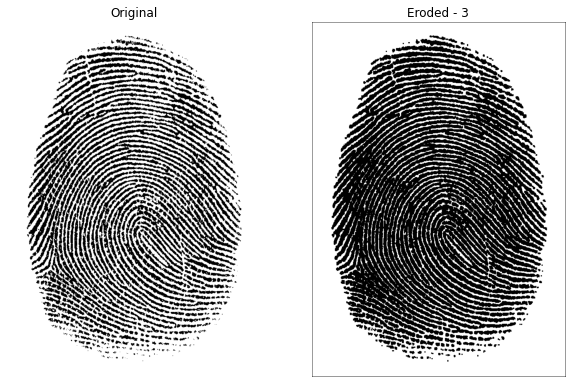

In [21]:
morph.erode_image(image_src=image_src, with_plot=True)

### Dilation

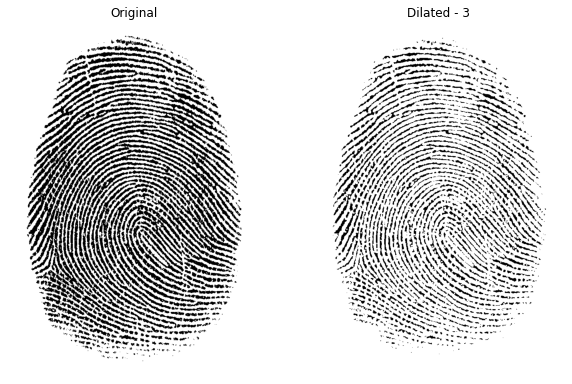

In [22]:
morph.dilate_image(image_src=image_src, with_plot=True)

### Opening

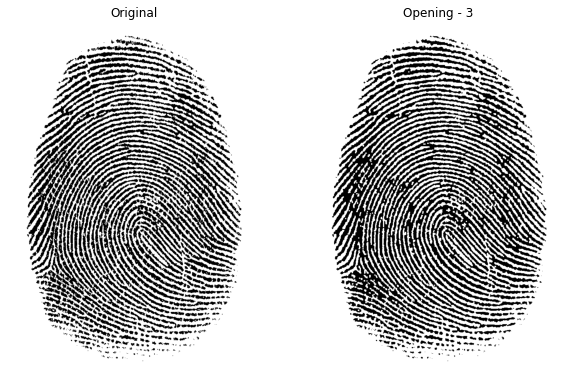

In [23]:
morph.open_image(image_src=image_src, with_plot=True)

### Closing

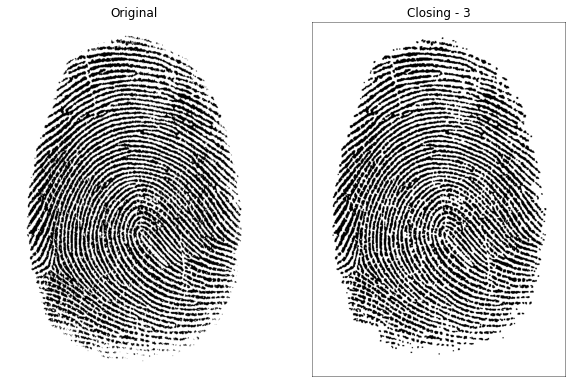

In [24]:
morph.close_image(image_src=image_src, with_plot=True)

### Morphological Gradient

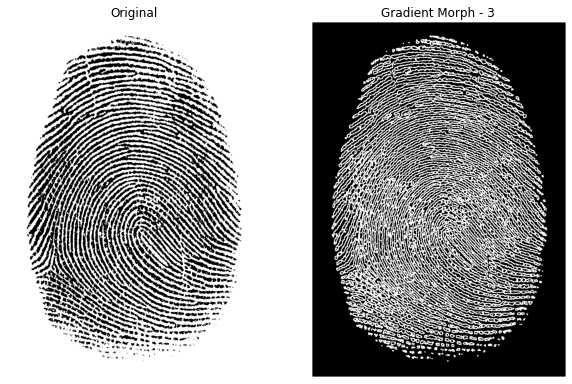

In [25]:
morph.morph_gradient(image_src=image_src, with_plot=True)

### Top Hat

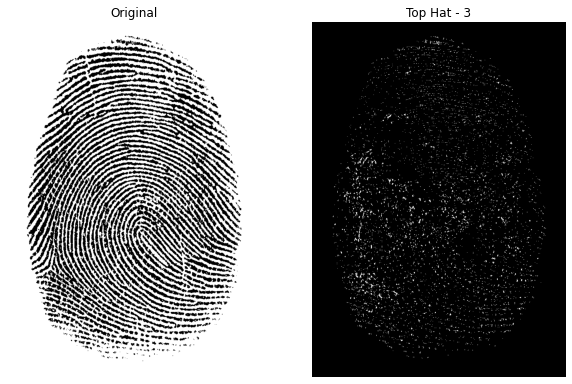

In [26]:
morph.get_tophat(image_src=image_src, with_plot=True)

### Black Hat

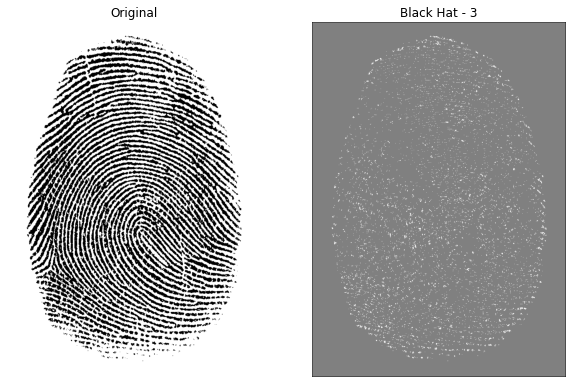

In [27]:
morph.get_blackhat(image_src=image_src, with_plot=True)

### Boundary Extraction

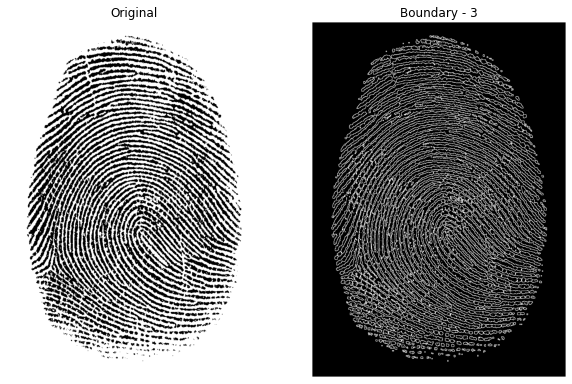

In [28]:
morph.extract_boundary(image_src=image_src, with_plot=True)

# Application of Morphological Operations - 2 

#### Dealing with Laptop Camera

In [6]:
# Python program to illustrate
# Gradient morphological operation
# on input frames

# organizing imports
import cv2
import numpy as np

# return video from the first webcam on your computer.
screenRead = cv2.VideoCapture(0)

# loop runs if capturing has been initialized.
while(1):
	# reads frames from a camera
	_, image = screenRead.read()
	
	# Converts to HSV color space, OCV reads colors as BGR
	# frame is converted to hsv
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	
	# defining the range of masking
	blue1 = np.array([110, 50, 50])
	blue2 = np.array([130, 255, 255])
	
	# initializing the mask to be
	# convoluted over input image
	mask = cv2.inRange(hsv, blue1, blue2)

	# passing the bitwise_and over
	# each pixel convoluted
	res = cv2.bitwise_and(image, image, mask = mask)
	
	# defining the kernel i.e. Structuring element
	kernel = np.ones((5, 5), np.uint8)
	
	# defining the gradient function
	# over the image and structuring element
	gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
	
	# The mask and closing operation
	# is shown in the window
	cv2.imshow('Gradient', gradient)
	
	# Wait for 'a' key to stop the program
	if cv2.waitKey(1) & 0xFF == ord('a'):
		break

# De-allocate any associated memory usage
cv2.destroyAllWindows()

# Close the window / Release webcam
screenRead.release()
